In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [2]:
# Load the dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# Define the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [4]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
model.fit(train_images[..., tf.newaxis], train_labels, epochs=5)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images[..., tf.newaxis], test_labels)
print('Test accuracy:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 104s 55ms/step - loss: 0.4151 - accuracy: 0.8494
Epoch 2/5
1875/1875 [==============================] - 104s 56ms/step - loss: 0.2651 - accuracy: 0.9031
Epoch 3/5
1875/1875 [==============================] - 106s 57ms/step - loss: 0.2221 - accuracy: 0.9167
Epoch 4/5
1875/1875 [==============================] - 110s 59ms/step - loss: 0.1906 - accuracy: 0.9290
Epoch 5/5
313/313 [==============================] - 5s 14ms/step - loss: 0.2369 - accuracy: 0.9219
Test accuracy: 0.9218999743461609


313/313 [==============================] - 7s 23ms/step


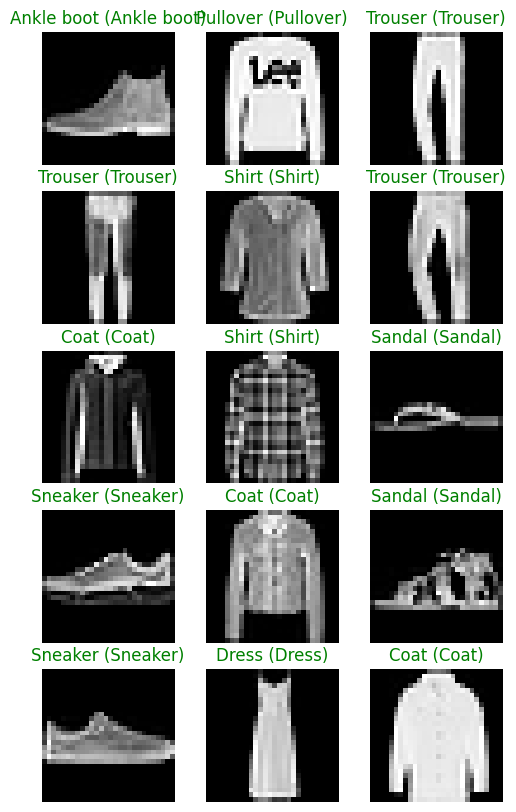

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Make predictions on the test set
predictions = model.predict(test_images[..., tf.newaxis])

# Plot a random sample of test images with their predicted labels
num_rows, num_cols = 5, 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plt.imshow(test_images[i], cmap='gray')
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.title('{} ({})'.format(class_names[predicted_label], class_names[true_label]), color=color)
    plt.axis('off')
plt.show()